In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm

# 1.Prepare a prediction model for profit of 50_startups data.
    # Do transformations for getting better predictions of profit and
   # make a table containing R^2 value for each prepared model.

In [2]:
STT = pd.read_csv("50_Startups.csv")
STT

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA of the data set 

In [3]:
STT=STT.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
STT.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
STT.tail()

,RDS,ADMS,MKTS,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
STT.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
STT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADMS    50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
STT.isna().sum()

RDS       0
ADMS      0
MKTS      0
State     0
Profit    0
dtype: int64

In [8]:
f=STT.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
STT.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# check the correlation of the variables

In [9]:
STT.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

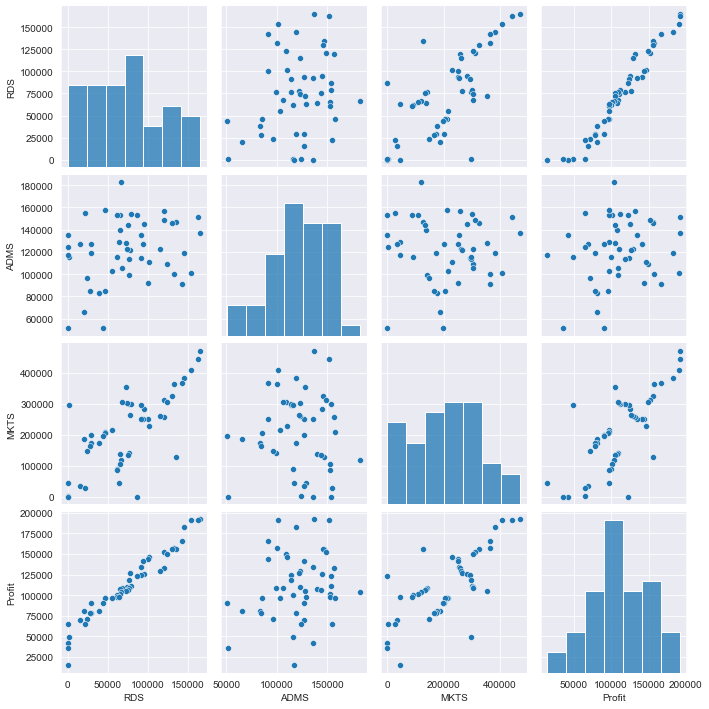

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(STT)

# Preparing a model

In [11]:
model = smf.ols("Profit~RDS+ADMS+MKTS",data=STT).fit()
model

In [12]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           4.53e-30
Time:                        21:51:54   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
print(model.tvalues, '/n' , model.pvalues)

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64 /n Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple linear regression

In [16]:
ml_M = smf.ols("Profit~MKTS",data=STT).fit()
print(ml_M.tvalues, '/n' , ml_M.pvalues)

Intercept    7.808356
MKTS         7.802657
dtype: float64 /n Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


In [17]:
ml_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           4.38e-10
Time:                        21:51:58   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKTS           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
ml_R = smf.ols("Profit~RDS",data=STT).fit()
print(ml_R.tvalues, '/n' , ml_R.pvalues)

Intercept    19.320288
RDS          29.151139
dtype: float64 /n Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64


In [19]:
ml_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           3.50e-32
Time:                        21:52:00   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDS            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
ml_A = smf.ols("Profit~ADMS",data=STT).fit()
print(ml_A.tvalues, '/n' , ml_A.pvalues)

Intercept    3.040044
ADMS         1.419493
dtype: float64 /n Intercept    0.003824
ADMS         0.162217
dtype: float64


In [21]:
ml_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 19 Sep 2022   Prob (F-statistic):              0.162
Time:                        21:52:01   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADMS           0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF¶

In [22]:
rsq_M = smf.ols("MKTS~RDS+ADMS",data=STT).fit().rsquared
vif_M = (1/(1-rsq_M))
rsq_R = smf.ols("RDS~MKTS+ADMS",data=STT).fit().rsquared
vif_R = (1/(1-rsq_R))
rsq_A = smf.ols("ADMS~RDS+MKTS",data=STT).fit().rsquared
vif_A = (1/(1-rsq_A))


# Storing vif values in a data frame

In [23]:
d1 = {'Variables':['MKTS','RDS','ADMS'],'VIF':[vif_M,vif_R,vif_A]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,MKTS,2.326773
1,RDS,2.468903
2,ADMS,1.175091


# Residue analysis

# Q-Q plot for normal residue

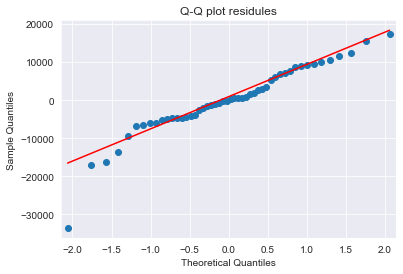

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot residules")
plt.show()

In [25]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [26]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()


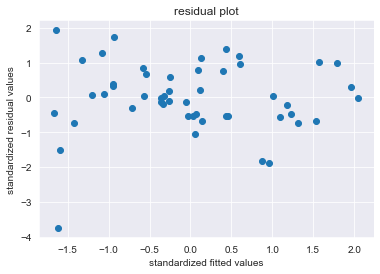

In [27]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("residual plot")
plt.xlabel("standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()

# Residual Vs Regressors

eval_env: 1


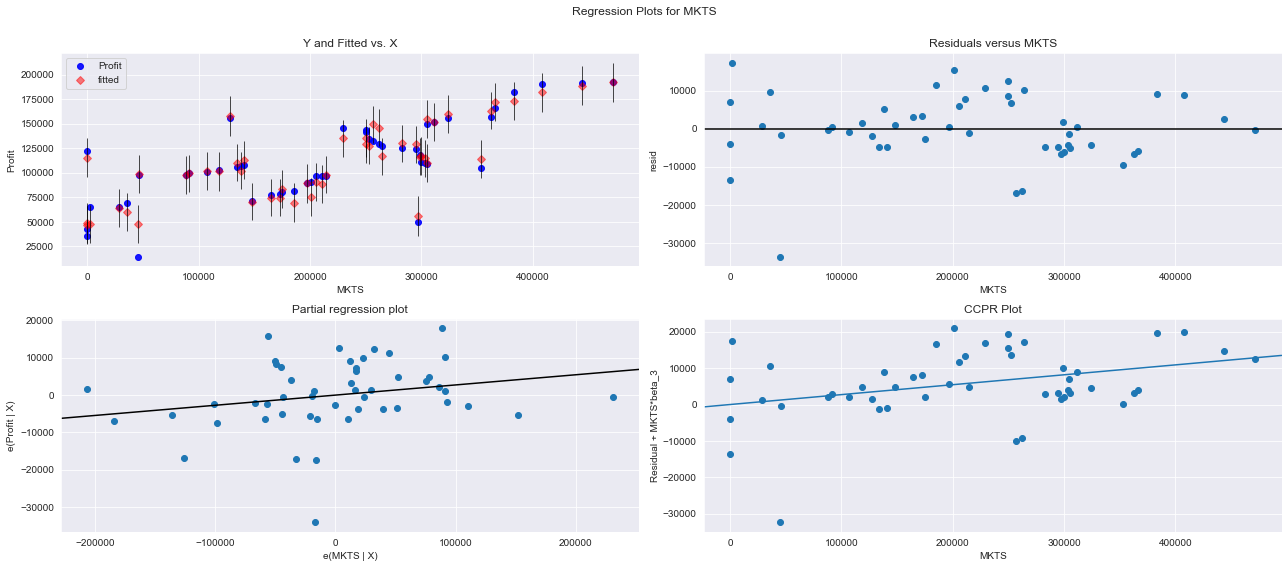

In [28]:
fig = plt.figure(figsize=(18,8))
fig = sm.graphics.plot_regress_exog(model, 'MKTS' , fig=fig)
plt.show()

eval_env: 1


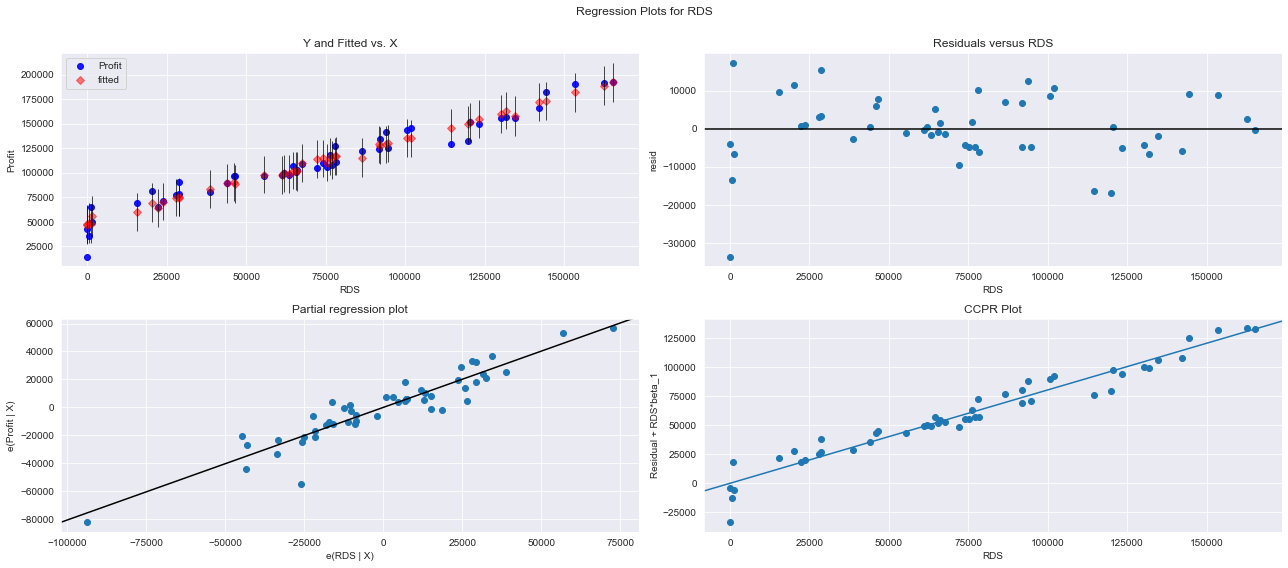

In [29]:
fig = plt.figure(figsize=(18,8))
fig = sm.graphics.plot_regress_exog(model, 'RDS', fig=fig)
plt.show()

eval_env: 1


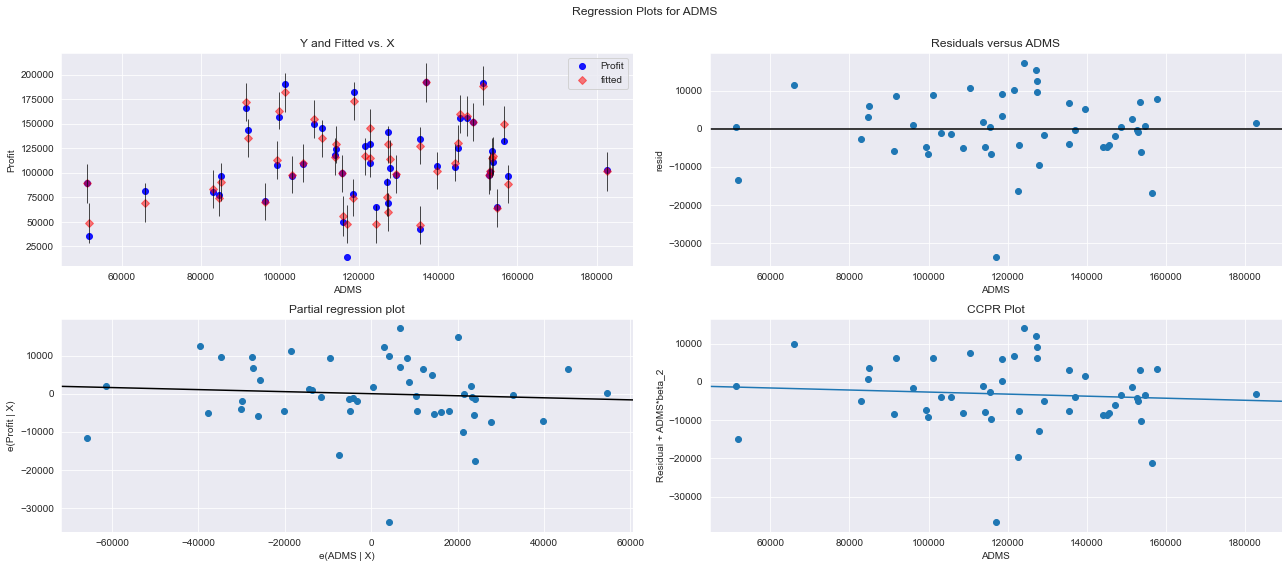

In [30]:
fig = plt.figure(figsize=(18,8))
fig = sm.graphics.plot_regress_exog(model, 'ADMS', fig=fig)
plt.show()

# Model Deletion Diagnostics¶

# Detecting Influencers/Outliers

# Cook’s Distance

In [31]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

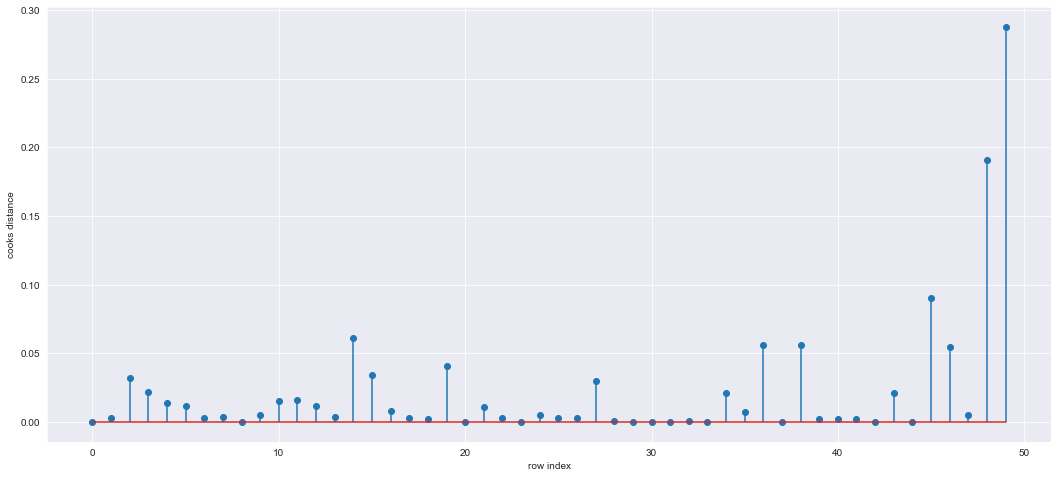

In [32]:
fig = plt.subplots(figsize=(18,8))
plt.stem(np.arange(len(STT)),np.round(c, 3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [33]:
(np.argmax(c),np.max(c)) 

(49, 0.28808229275432634)

# High Influence points

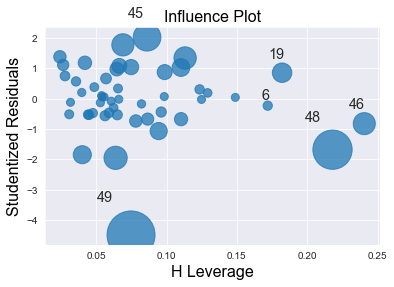

In [34]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [35]:
k = STT.shape[1]
n = STT.shape[0]
levarege_cutoff = 3*((k-1)/n)

In [36]:
STT[STT.index.isin([49])]


,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [37]:
STT.tail()

,RDS,ADMS,MKTS,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Improving the model

In [38]:
STT_new = pd.read_csv("50_Startups.csv")

In [39]:
STT1 = STT_new.drop(STT_new.index[49],axis=0).reset_index()

In [40]:
STT1 = STT1.drop(['index'],axis=1)

In [41]:
STT1.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


# Build Model

In [42]:
model1 = smf.ols("Profit~RDS+MKTS",data=STT).fit()
(model1.rsquared,model1.aic,model1.bic) 

(0.9504503015559763, 1057.070772191826, 1062.8068412081107)

In [43]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           2.16e-31
Time:                        21:52:51   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDS            0.7966      0.041     19.266      0.000       0.713       0.880
MKTS           0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model2 = smf.ols("Profit~RDS+ADMS+MKTS",data=STT).fit()
(model1.rsquared,model1.aic,model1.bic)

(0.9504503015559763, 1057.070772191826, 1062.8068412081107)

In [45]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           4.53e-30
Time:                        21:52:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# final model

In [46]:
final_model=smf.ols('Profit~RDS+MKTS',data=STT).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           2.16e-31
Time:                        21:52:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDS            0.7966      0.041     19.266      0.000       0.713       0.880
MKTS           0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
final_model.resid

0      -538.628625
1      2017.400520
2      9645.011903
3      9460.681158
4     -4939.683218
5     -5888.190812
6     -1905.620454
7     -4703.138877
8      -106.033673
9     -4583.853935
10    11110.035276
11     9620.529925
12    12367.123421
13     6495.144535
14   -17589.841797
15   -16115.675433
16     9967.038152
17    -5459.074732
18    -4615.298828
19     6960.441667
20     1823.137908
21    -7071.150709
22    -4638.134639
23    -1152.195217
24    -4000.147151
25     4791.430758
26    -5257.252884
27    -9970.295150
28      157.367240
29    -1435.784090
30      852.370438
31     -830.988854
32    -1436.822254
33     -821.810445
34     6450.158781
35     6703.015715
36    14883.956088
37     1975.125482
38    12597.741677
39    -1919.055275
40     3190.853969
41     3684.941295
42     1264.239426
43     9368.747148
44     -289.399308
45    17096.506020
46    -7419.050859
47    -4416.134221
48   -11734.242602
49   -33645.494462
dtype: float64

In [48]:
final_model.params

Intercept    46975.864221
RDS              0.796584
MKTS             0.029908
dtype: float64

In [49]:
print(final_model.tvalues, '/n' , final_model.pvalues)

Intercept    17.463582
RDS          19.265555
MKTS          1.927052
dtype: float64 /n Intercept    3.504062e-22
RDS          6.040433e-24
MKTS         6.003040e-02
dtype: float64


In [50]:
(final_model.rsquared,final_model.rsquared_adj)

(0.9504503015559763, 0.9483418037498477)

In [51]:
final_model_predicted=final_model.predict()
final_model_predicted

array([192800.45862502, 189774.65948019, 181405.37809703, 173441.30884249,
       171127.62321762, 162879.31081217, 158028.13045422, 160455.73887656,
       152317.8036728 , 154343.8139353 , 135011.91472396, 134638.87007529,
       129218.39657898, 127812.20546461, 150192.49179713, 146032.71543309,
       117025.89184753, 130829.44473222, 128882.19882756, 115816.41833283,
       116650.89209156, 118384.17070857, 114990.38463925, 109886.18521692,
       112552.18715137, 102612.90924225, 110990.79288437, 114978.60515008,
       103125.01275975, 102440.42409014,  99085.21956154,  98314.54885378,
        98864.66225433,  97600.73044466,  90262.64121898,  89776.4942853 ,
        75824.23391247,  87974.01451829,  68631.3183233 ,  82924.81527479,
        75049.0560307 ,  74113.88870454,  70234.25057356,  60390.23285206,
        65489.72930769,  47829.57397995,  56909.80085883,  46975.86422072,
        47407.6526018 ,  48326.89446186])

In [52]:
rmse = np.sqrt((np.mean(np.array(STT['Profit'])-np.array(final_model_predicted))**2))
rmse

3.128661774098873e-11

# ToyotaCorolla Data set

In [53]:
TTC=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [54]:
TTC=pd.concat([TTC.iloc[:,2:4],TTC.iloc[:,6:7],TTC.iloc[:,8:9],TTC.iloc[:,12:14],TTC.iloc[:,15:18]],axis=1)
TTC=TTC.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
TTC 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [55]:
TTC.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [56]:
TTC.tail()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


In [57]:
TTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [58]:
TTC.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [59]:
TTC.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

# Correlation Matrix

In [60]:
TTC.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables along with histograms

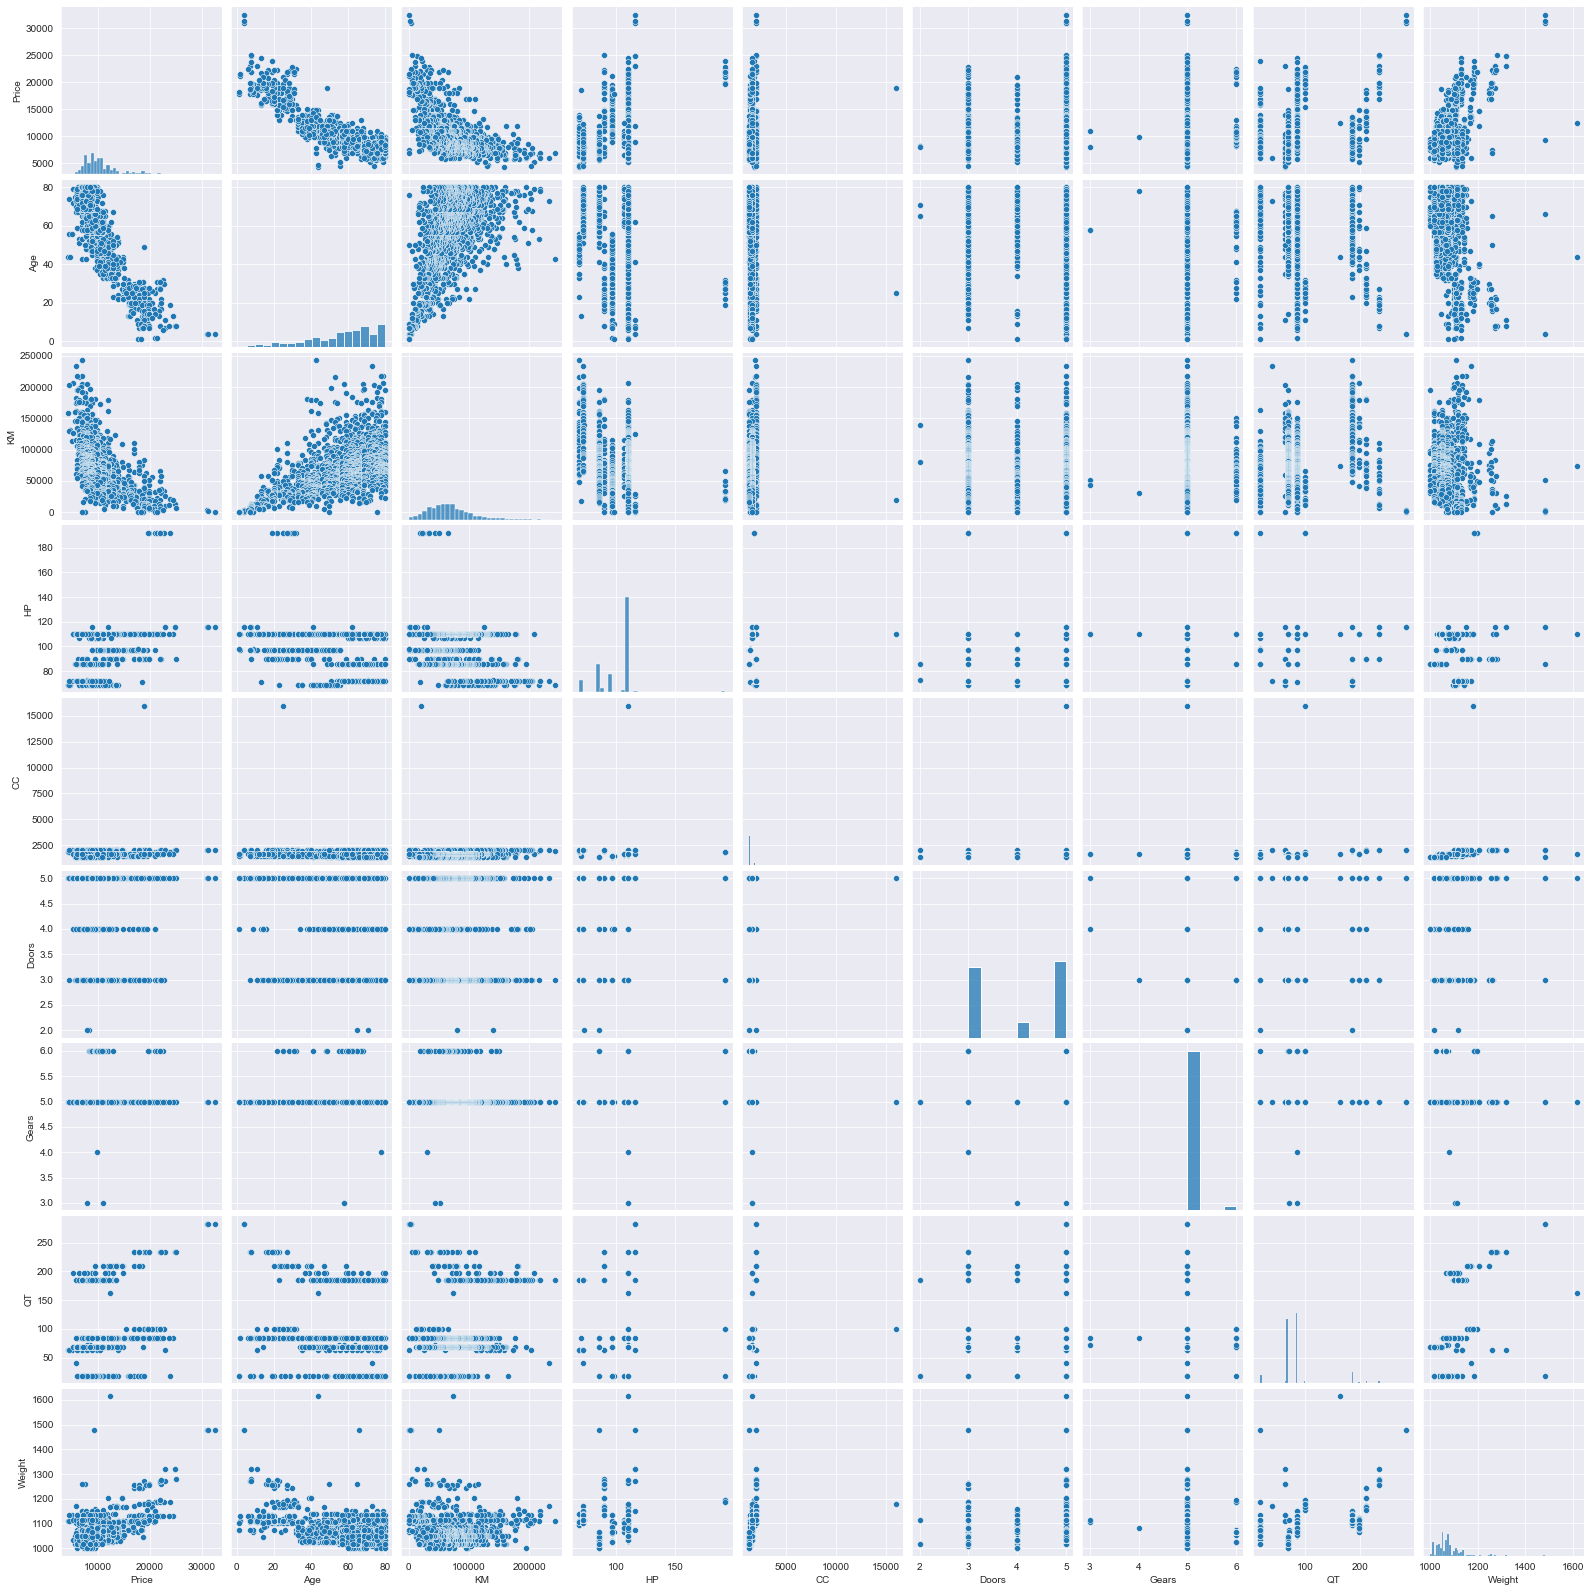

In [61]:
sns.set_style(style='darkgrid')
sns.pairplot(TTC)

# Preparing a model

In [62]:
model_corllo=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=TTC).fit()
model_corllo

In [63]:
model_corllo.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [64]:
print(model_corllo.tvalues, '/n' , model_corllo.pvalues)

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
CC           -1.344222
Doors        -0.040410
Gears         3.016007
QT            3.014535
Weight       15.879803
dtype: float64 /n Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
CC            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
QT            2.619148e-03
Weight        2.048576e-52
dtype: float64


In [65]:
(model_corllo.rsquared,model_corllo.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [66]:
model_corllo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:53:29   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models

In [67]:
model_corllo_1 = smf.ols("Price~Doors+CC",data=TTC).fit()
model_corllo_1

In [68]:
model_corllo_1.params

Intercept    6509.421098
Doors         671.397311
CC              0.959740
dtype: float64

In [69]:
print(model_corllo_1.tvalues, '/n' , model_corllo_1)

Intercept    12.620704
Doors         6.816153
CC            4.340400
dtype: float64 /n <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002BB5796A190>


In [70]:
model_corllo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.15e-15
Time:                        21:53:34   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
CC             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# VIF values

In [71]:
rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=TTC).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=TTC).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=TTC).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=TTC).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=TTC).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=TTC).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=TTC).fit().rsquared
vif_WT=1/(1-rsq_WT)

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=TTC).fit().rsquared
vif_age=1/(1-rsq_age)


d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df



,Variables,Vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


# Residue analysis

# Q-Q plot for normal residue

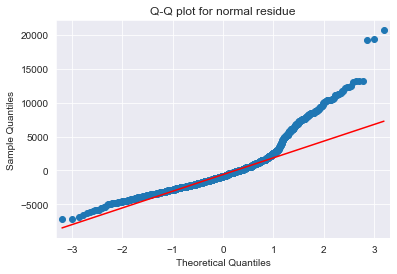

In [72]:
qq_plot=sm.qqplot(model_corllo_1.resid,line='q')
plt.title("Q-Q plot for normal residue")
plt.show()

In [73]:
list(np.where(model_corllo_1.resid))

[array([   0,    1,    2, ..., 1433, 1434, 1435], dtype=int64)]

# Residual Plot for Homoscedasticity

In [74]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

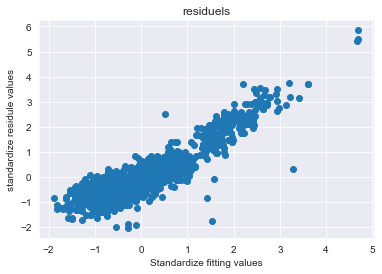

In [75]:
plt.scatter(get_standardized_values(model_corllo.fittedvalues),get_standardized_values(model_corllo_1.resid))
plt.title("residuels")
plt.xlabel("Standardize fitting values")
plt.ylabel("standardize residule values")
plt.show()

# Residual Vs Regressors

eval_env: 1


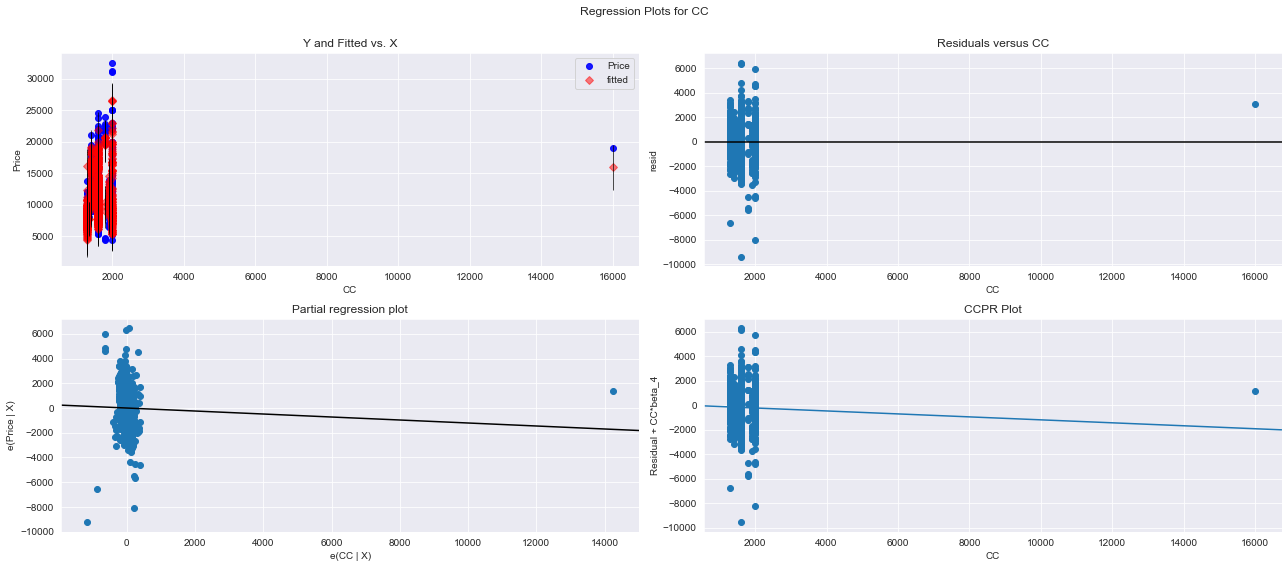

In [76]:
fig = plt.figure(figsize=(18,8))
fig = sm.graphics.plot_regress_exog(model_corllo, 'CC' , fig=fig)
plt.show()

eval_env: 1


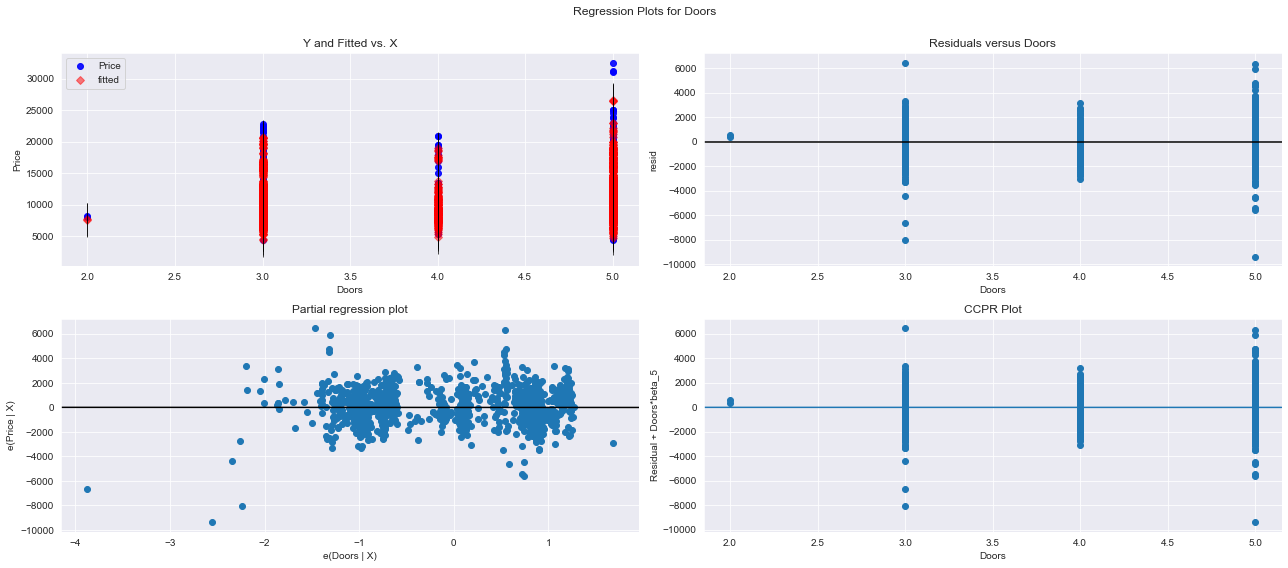

In [77]:
fig = plt.figure(figsize=(18,8))
fig = sm.graphics.plot_regress_exog(model_corllo, 'Doors' ,fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [78]:
model_influence = model_corllo.get_influence()
(c_, _) = model_influence.cooks_distance

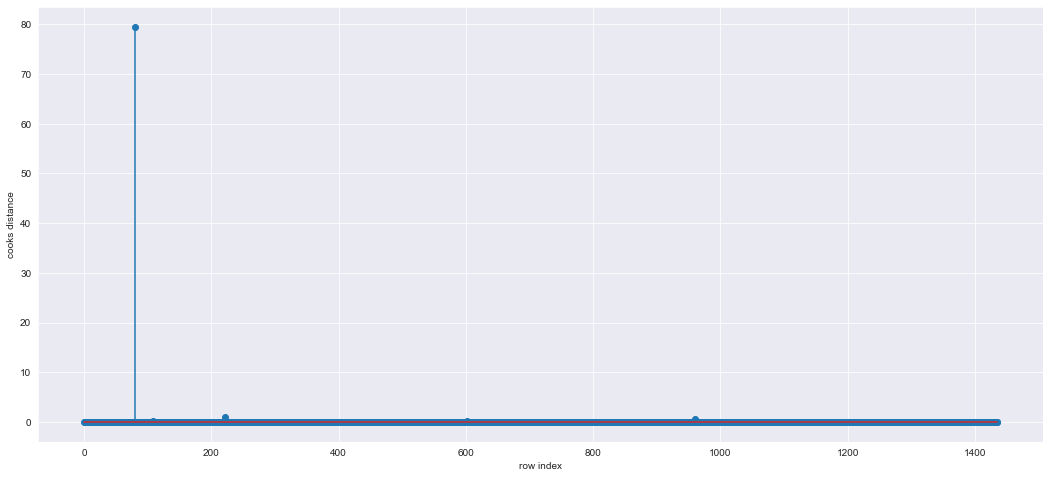

In [79]:
fig = plt.subplots(figsize=(18,8))
plt.stem(np.arange(len(TTC)),np.round(c_, 3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [80]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# High Influence points

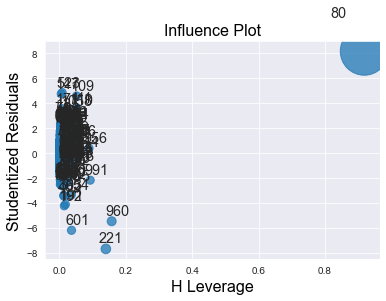

In [81]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_corllo)
plt.show()

In [82]:
k = TTC.shape[1]
n = TTC.shape[0]
levarege_cutoff = 3*((k+1)/n)

# from above plot, it is evident the data point 49 the influence

In [83]:
TTC[TTC.index.isin([49])]


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
49,21950,31,64982,192,1800,5,6,100,1195


In [84]:
TTC.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Improving the model

In [85]:
TTC1=TTC.drop(TTC.index[221],axis=0).reset_index()
TTC1=TTC1.drop(['index'],axis=1)
TTC1.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Build Model

In [99]:
final_model_corllo=smf.ols('Price~Age+KM+HP+Gears+QT+Weight',data=TTC1).fit()
final_model_corllo

In [100]:
final_model_corllo.params

Intercept   -8341.588004
Age          -119.001199
KM             -0.021151
HP             29.536576
Gears         606.862890
QT              1.900805
Weight         19.556052
dtype: float64

In [101]:
final_model_corllo.resid

0      -3302.173081
1      -2503.290654
2      -2844.741949
3      -1473.722650
4      -2496.429989
           ...     
1430   -1263.378128
1431    2601.529277
1432      95.565043
1433   -1275.551229
1434   -3769.195270
Length: 1435, dtype: float64

In [102]:
final_model_corllo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1575.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:02:39   Log-Likelihood:                -12341.
No. Observations:                1435   AIC:                         2.470e+04
Df Residuals:                    1428   BIC:                         2.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8341.5880   1433.844     -5.818      0.000   -1.12e+04   -5528.922
Age         -119.0012      2.591    -45.925      0.000    -124.084    -113.918
KM            -0.0212      0.001    -17.259      0.000      -0.024      -0.019
HP            29.5366      2.757     10.713      0.000      24.128      34.945
Gears        606.8629    189.809      3.197      0.001     234.528     979.198
QT             1.9008      1.295      1.467      0.142      -0.640       4.442
Weight        19.5561      1.070     18.279      0.000      17.457      21.655
==============================================================================
Omnibus:                      130.086   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.019
Skew:                          -0.196   Prob(JB):                    2.71e-157
Kurtosis:                       6.450   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
print(final_model_corllo.tvalues, '/n' , final_model_corllo.pvalues)

Intercept    -5.817640
Age         -45.924582
KM          -17.259164
HP           10.713269
Gears         3.197226
QT            1.467471
Weight       18.278667
dtype: float64 /n Intercept     7.355732e-09
Age          1.517703e-283
KM            9.018701e-61
HP            8.186402e-26
Gears         1.417970e-03
QT            1.424682e-01
Weight        3.109607e-67
dtype: float64


In [104]:
(final_model_corllo.rsquared,final_model_corllo.rsquared_adj)

(0.8687396213904708, 0.8681881071946325)

In [105]:
pred = final_model_corllo.predict()
pred

array([16802.17308148, 16253.29065372, 16794.74194904, ...,
        8404.43495746,  8525.55122916, 10719.1952703 ])

In [107]:
rmse = np.sqrt((np.mean(np.array(TTC1["Price"])-np.array(pred))**2))
rmse

2.6100102198741783e-09

In [108]:
list(TTC1)

['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight']

(array([  2.,   1.,   4.,  16., 193., 645., 469.,  92.,  10.,   3.]),
 array([-6.57720111, -5.44359903, -4.30999695, -3.17639487, -2.0427928 ,
        -0.90919072,  0.22441136,  1.35801343,  2.49161551,  3.62521759,
         4.75881967]),
 <BarContainer object of 10 artists>)

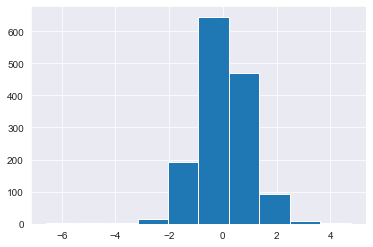

In [112]:
plt.hist(final_model_corllo.resid_pearson)

# Predicted new data points

In [114]:
new_data1=pd.DataFrame({'Age':28, 'KM':46789, 'HP':80, 'CC':1000, 'Doors':5, 'Gears':3, 'QT':435, 'Weight':2134},index=[1])

In [115]:
final_model_corllo.predict(new_data1)

1    34079.738314
dtype: float64